In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

import seaborn as sns

%matplotlib inline

# Data Structures accepted by seaborn
## Long form ws. wide form
Basically, you want to use long form
### Long Form data
* each variable is a column
* each **observation** is a row

In [2]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


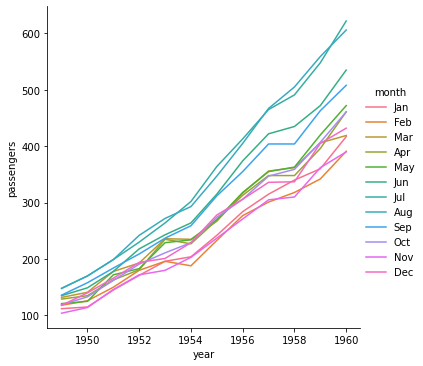

In [3]:
sns.relplot(data = flights, x = 'year', y= 'passengers', hue = 'month', kind = 'line')

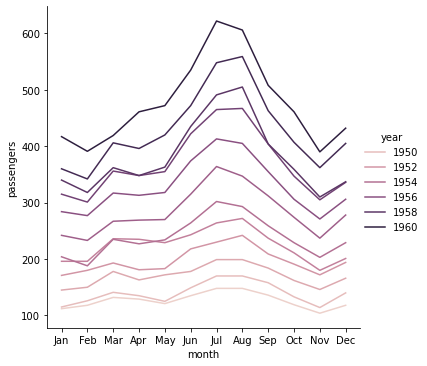

In [6]:
sns.relplot(data =flights, x= 'month', y= 'passengers', hue = 'year', kind = 'line')

### Wide-form data

In [3]:
flights_wide = flights.pivot(index='year', columns='month',values='passengers')
flights_wide.head

<bound method NDFrame.head of month  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
year                                                             
1949   112  118  132  129  121  135  148  148  136  119  104  118
1950   115  126  141  135  125  149  170  170  158  133  114  140
1951   145  150  178  163  172  178  199  199  184  162  146  166
1952   171  180  193  181  183  218  230  242  209  191  172  194
1953   196  196  236  235  229  243  264  272  237  211  180  201
1954   204  188  235  227  234  264  302  293  259  229  203  229
1955   242  233  267  269  270  315  364  347  312  274  237  278
1956   284  277  317  313  318  374  413  405  355  306  271  306
1957   315  301  356  348  355  422  465  467  404  347  305  336
1958   340  318  362  348  363  435  491  505  404  359  310  337
1959   360  342  406  396  420  472  548  559  463  407  362  405
1960   417  391  419  461  472  535  622  606  508  461  390  432>

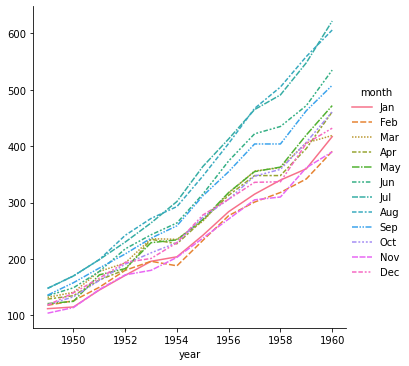

In [9]:
sns.relplot(data=flights_wide, kind = 'line')

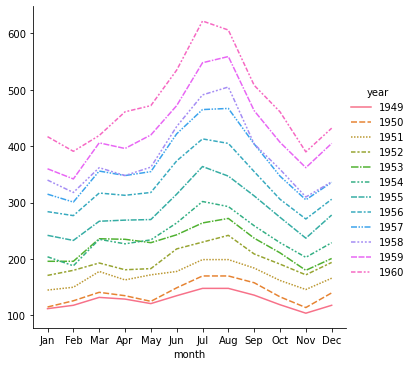

In [10]:
sns.relplot(data=flights_wide.T, kind= 'line')
#sns.relplot(data = flights_wide.transpose(), kind = 'line')  #THis is what they told me to do

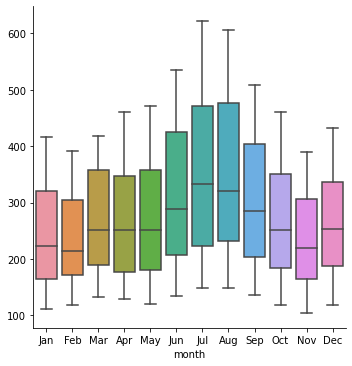

In [11]:
sns.catplot(data = flights_wide, kind = 'box')

You can't have more than three variables in wide form

### Messy Data

In [4]:
anagrams = sns.load_dataset("anagrams")
anagrams    #this data is messy because it's not clearly long form or short form

,subidr,attnr,num1,num2,num3
0,1,divided,2,4.0,7
1,2,divided,3,4.0,5
2,3,divided,3,5.0,6
3,4,divided,5,7.0,5
4,5,divided,4,5.0,8
5,6,divided,5,5.0,6
6,7,divided,5,4.5,6
7,8,divided,5,7.0,8
8,9,divided,2,3.0,7
9,10,divided,6,5.0,6


In [5]:
# let's make it tidy by forcing it into long form
anagrams_long = anagrams.melt(id_vars=['subidr','attnr'], var_name='solutions', value_name='score')
anagrams_long.head()

,subidr,attnr,solutions,score
0,1,divided,num1,2.0
1,2,divided,num1,3.0
2,3,divided,num1,3.0
3,4,divided,num1,5.0
4,5,divided,num1,4.0


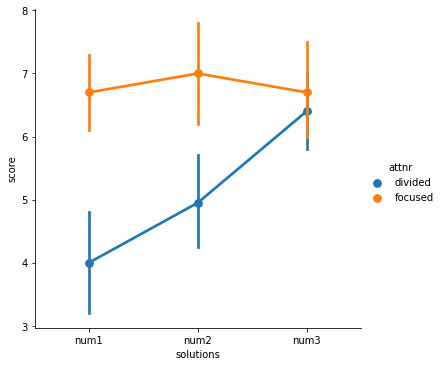

In [17]:
sns.catplot(data=anagrams_long, x="solutions", y="score", hue="attnr", kind="point")

## Options for visualizing long-form data

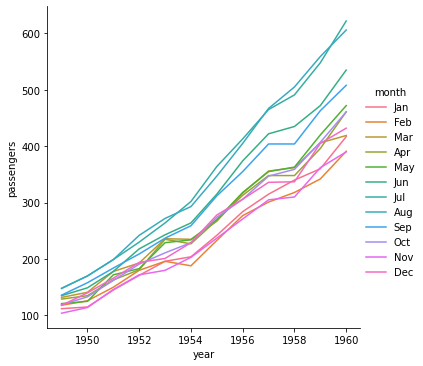

In [6]:
flights_dict = flights.to_dict()
sns.relplot(data = flights_dict, x = 'year', y= 'passengers', hue = 'month', kind = 'line')

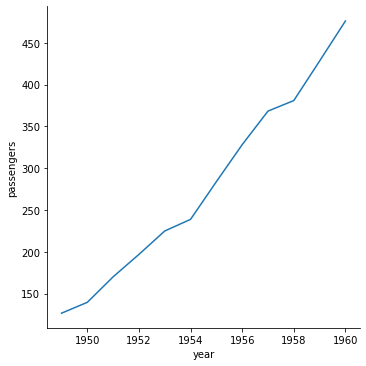

In [7]:
flights_avg=flights.groupby('year').mean()
sns.relplot(data = flights_avg, x = 'year', y= 'passengers', kind = 'line')

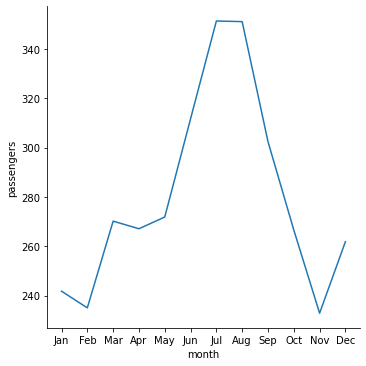

In [8]:
flights_mavg = flights.groupby('month').mean()
sns.relplot(data = flights_mavg, x = 'month', y= 'passengers', kind = 'line')

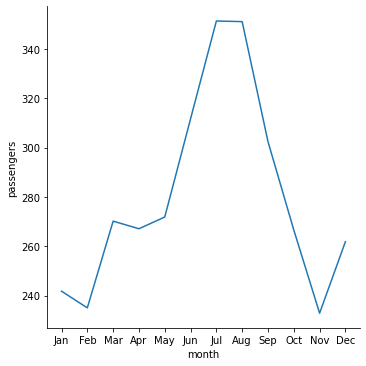

In [10]:
month = flights_mavg.index
passengers = flights_mavg['passengers']
sns.relplot(x=month, y= passengers, kind = 'line')

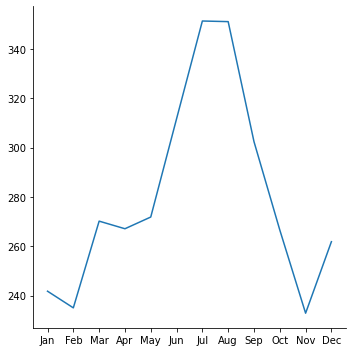

In [12]:
sns.relplot(x=month.to_numpy(), y=passengers.to_list(), kind= 'line')

## Options for visualizing wide-form data

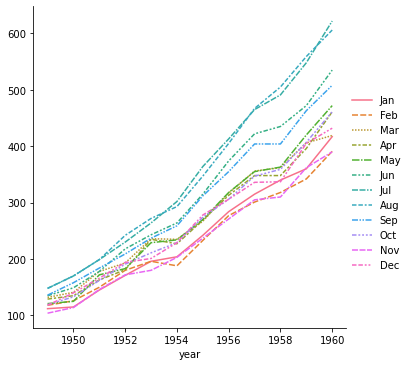

In [13]:
flights_wide_list = [col for _, col in flights_wide.items()]
sns.relplot(data=flights_wide_list, kind = 'line')

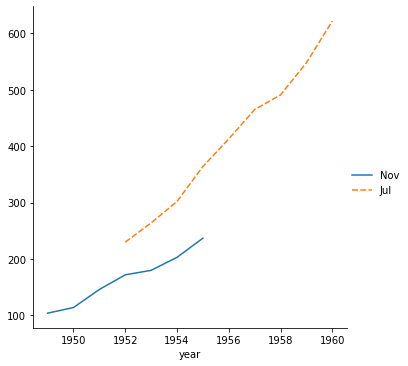

In [20]:
#vectors don't need to be same length, can be aligned if they have an index
two_series = [flights_wide.loc[:1955, 'Nov'], flights_wide.loc[1952:, 'Jul']]
sns.relplot(data= two_series, kind = 'line')

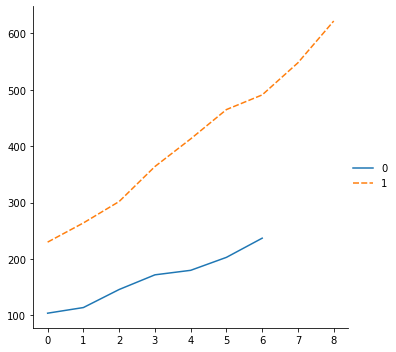

In [22]:
#no index
two_arrays = [s.to_numpy() for s in two_series]
sns.relplot(data=two_arrays, kind='line')

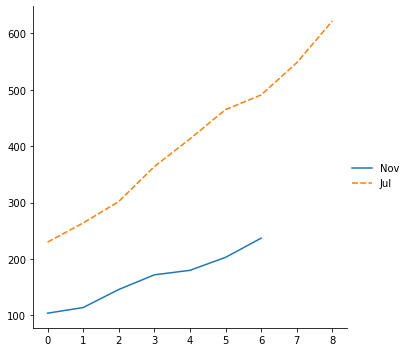

In [23]:
#dict keeps keys, still no index
two_arrays_dict = {s.name: s.to_numpy() for s in two_series}
sns.relplot(data=two_arrays_dict, kind="line")

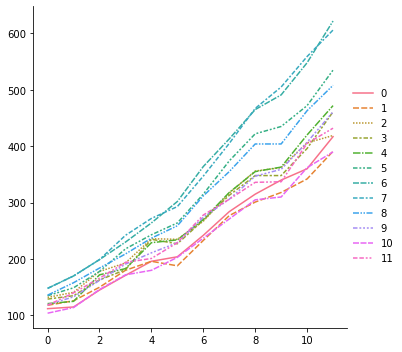

In [24]:
flights_array = flights_wide.to_numpy()
sns.relplot(data=flights_array, kind="line")